In [80]:
import pandas as pd
import numpy as np
import sqlalchemy
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime

# Deutsche Bahn Data

## Exploration

In [81]:
station_df = pd.read_sql("select * from stations", "sqlite:///data.sqlite")
station_df

,EVA_NR,DS100,IFOPT,NAME,Verkehr,Laenge,Breite,Betreiber_Name,Betreiber_Nr,Status
0,8002551,AELB,de:02000:11943,Hamburg Elbbrücken,RV,"10,0245","53,5345",DB Station und Service AG,0,neu
1,8001944,TETN,,Eutingen Nord,RV,"8,7531","48,4847",DB Station und Service AG,0,neu
2,8003074,MIA,,Ingolstadt Audi,RV,"11,4074564","48,7904959",DB Station und Service AG,0,neu
3,8001723,HEBA,,Einbeck Otto-Hahn-Straße,RV,"9,89290953","51,8144784",Ilmebahn GmbH,0,neu
4,8004371,KRO,,Nörvenich-Rommelsheim,nur DPN,"6,547586","50,782539",Rurtalbahn GmbH,0,neu
...,...,...,...,...,...,...,...,...,...,...
6514,8003318,SKB,de:10041:8003318,Kleinblittersdorf,nur DPN,"7,033459","49,157289",DB Station und Service AG,3243,
6515,8085007,TBO H,de:08115:4712,Böblingen Heusteigstr,nur DPN,"9,025771","48,675633",Zweckverband Schönbuchbahn,0,
6516,8085006,TBOS,de:08115:6742,Böblingen Südbf,nur DPN,"9,010509","48,677236",Zweckverband Schönbuchbahn,0,
6517,8085008,TBO Z,de:08115:4713,Böblingen Zimmerschlag,nur DPN,"9,03522491","48,6704564",Zweckverband Schönbuchbahn,0,


In [82]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6519 entries, 0 to 6518
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EVA_NR          6519 non-null   int64 
 1   DS100           6519 non-null   object
 2   IFOPT           6519 non-null   object
 3   NAME            6519 non-null   object
 4   Verkehr         6519 non-null   object
 5   Laenge          6519 non-null   object
 6   Breite          6519 non-null   object
 7   Betreiber_Name  6519 non-null   object
 8   Betreiber_Nr    6519 non-null   int64 
 9   Status          6519 non-null   object
dtypes: int64(2), object(8)
memory usage: 509.4+ KB


In [83]:
station_df = station_df[['EVA_NR', 'NAME', 'Laenge', 'Breite']]
station_df["Laenge"] = station_df["Laenge"].replace(to_replace=r",", value=".",regex=True)
station_df["Breite"] = station_df["Breite"].replace(to_replace=r",", value=".",regex=True)
station_df["Laenge"] = station_df["Laenge"].astype(float)
station_df["Breite"] = station_df["Breite"].astype(float)
station_df = station_df[station_df['Breite'].notnull()]
station_df = station_df[station_df['Laenge'].notnull()]
station_df = station_df.rename({"NAME":"station_name", "Laenge":"laenge", "Breite":"breite"}, axis=1)
station_df

/tmp/ipykernel_234947/92561169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df["Laenge"] = station_df["Laenge"].replace(to_replace=r",", value=".",regex=True)
/tmp/ipykernel_234947/92561169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df["Breite"] = station_df["Breite"].replace(to_replace=r",", value=".",regex=True)
/tmp/ipykernel_234947/92561169.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,EVA_NR,station_name,laenge,breite
0,8002551,Hamburg Elbbrücken,10.024500,53.534500
1,8001944,Eutingen Nord,8.753100,48.484700
2,8003074,Ingolstadt Audi,11.407456,48.790496
3,8001723,Einbeck Otto-Hahn-Straße,9.892910,51.814478
4,8004371,Nörvenich-Rommelsheim,6.547586,50.782539
...,...,...,...,...
6514,8003318,Kleinblittersdorf,7.033459,49.157289
6515,8085007,Böblingen Heusteigstr,9.025771,48.675633
6516,8085006,Böblingen Südbf,9.010509,48.677236
6517,8085008,Böblingen Zimmerschlag,9.035225,48.670456


In [84]:
train_df = pd.read_sql("select * from  train_plan", "sqlite:///data.sqlite")
train_df.drop(['trip_type', 'train_type', 'train_number', 'train_line'], axis=1, inplace=True)
train_df

,EVA_NR,stop_id,platform,next_stations,passed_stations,arrival,departure
0,8002551,4233690232757792396-2306231549-8,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:10,2023-06-23 16:10
1,8002551,-2702560245969131856-2306231539-8,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:00,2023-06-23 16:00
2,8002551,-7753341628155933329-2306231603-8,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:24,2023-06-23 16:24
3,8002551,-1127202356575030201-2306231559-17,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 16:42,2023-06-23 16:43
4,8002551,4232395606053523396-2306231543-8,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:04,2023-06-23 16:04
...,...,...,...,...,...,...,...
140,8005169,-875217255437925122-2306251640-2,1,Kolbermoor|Bad Aibling Kurpark|Bad Aibling|Heu...,Rosenheim,2023-06-25 16:42,2023-06-25 16:42
141,8005933,3491902041901976989-2306251556-5,1,Bad Schönborn Süd|Bad Schönborn-Kronau|Rot-Mal...,Karlsruhe Hbf|Karlsruhe-Durlach|Bruchsal|Ubsta...,2023-06-25 16:16,2023-06-25 16:16
142,8005933,7776103978113399754-2306251512-26,2,Ubstadt-Weiher|Bruchsal|Karlsruhe-Durlach|Karl...,Germersheim|Lingenfeld|Heiligenstein(Pfalz)|Be...,2023-06-25 16:39,2023-06-25 16:40
143,8005933,5137604253813506464-2306251617-7,1,Bad Schönborn Süd|Bad Schönborn-Kronau|Rot-Mal...,Karlsruhe Hbf|Karlsruhe-Durlach|Weingarten(Bad...,2023-06-25 16:46,2023-06-25 16:46


In [85]:
plan_change_df = pd.read_sql("select * from  plan_change", "sqlite:///data.sqlite")
plan_change_df

,EVA_NR,stop_id,next_stations,passed_stations,arrival,departure,platform
0,8002551,-2278354346210726218-2306231553-8,N/A,N/A,2023-06-23 16:15,2023-06-23 16:14,N/A
1,8002551,-2635431666510097313-2306231519-17,N/A,N/A,2023-06-23 16:04,2023-06-23 16:06,N/A
2,8002551,-7753341628155933329-2306231603-8,N/A,N/A,2023-06-23 16:25,2023-06-23 16:25,N/A
3,8002551,-2702560245969131856-2306231539-8,N/A,N/A,2023-06-23 16:05,2023-06-23 16:05,N/A
4,8002551,-3476160998822756884-2306231619-8,N/A,N/A,2023-06-23 16:40,2023-06-23 16:40,N/A
...,...,...,...,...,...,...,...
3443,8000010,1741611661594654031-2306281217-14,None,None,None,None,None
3444,8000010,2825186461189901640-2306281354-1,None,None,None,None,None
3445,8000010,-7548623543593000837-2306281417-14,None,None,None,None,None
3446,8000010,7368404533619018762-2306281330-8,None,None,None,None,None


In [86]:
train_change_df = pd.merge(left=train_df, right=plan_change_df, on='stop_id', how='inner')
train_change_df.drop(["EVA_NR_y", "stop_id"], axis=1, inplace=True)
train_change_df.rename({"EVA_NR_x":"EVA_NR"}, axis=1, inplace=True)
train_change_df

,EVA_NR,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y
0,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:10,2023-06-23 16:10,N/A,N/A,2023-06-23 16:12,2023-06-23 16:13,N/A
1,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:00,2023-06-23 16:00,N/A,N/A,2023-06-23 16:05,2023-06-23 16:05,N/A
2,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:24,2023-06-23 16:24,N/A,N/A,2023-06-23 16:25,2023-06-23 16:25,N/A
3,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 16:42,2023-06-23 16:43,N/A,N/A,2023-06-23 16:42,2023-06-23 16:43,N/A
4,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:04,2023-06-23 16:04,N/A,N/A,2023-06-23 16:08,2023-06-23 16:08,N/A
...,...,...,...,...,...,...,...,...,...,...,...
119,8005169,1,Kolbermoor|Bad Aibling Kurpark|Bad Aibling|Heu...,Rosenheim,2023-06-25 16:42,2023-06-25 16:42,N/A,N/A,2023-06-25 16:42,2023-06-25 16:42,N/A
120,8005933,1,Bad Schönborn Süd|Bad Schönborn-Kronau|Rot-Mal...,Karlsruhe Hbf|Karlsruhe-Durlach|Bruchsal|Ubsta...,2023-06-25 16:16,2023-06-25 16:16,N/A,N/A,2023-06-25 16:16,2023-06-25 16:17,N/A
121,8005933,2,Ubstadt-Weiher|Bruchsal|Karlsruhe-Durlach|Karl...,Germersheim|Lingenfeld|Heiligenstein(Pfalz)|Be...,2023-06-25 16:39,2023-06-25 16:40,N/A,N/A,2023-06-25 16:42,2023-06-25 16:43,N/A
122,8005933,1,Bad Schönborn Süd|Bad Schönborn-Kronau|Rot-Mal...,Karlsruhe Hbf|Karlsruhe-Durlach|Weingarten(Bad...,2023-06-25 16:46,2023-06-25 16:46,N/A,N/A,2023-06-25 16:46,2023-06-25 16:47,N/A


In [87]:
train_change_df = pd.merge(left=train_change_df, right=station_df, on="EVA_NR", how="inner")
train_change_df.reset_index(inplace=True, drop=True)
train_change_df

,EVA_NR,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y,station_name,laenge,breite
0,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:10,2023-06-23 16:10,N/A,N/A,2023-06-23 16:12,2023-06-23 16:13,N/A,Hamburg Elbbrücken,10.024500,53.534500
1,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:00,2023-06-23 16:00,N/A,N/A,2023-06-23 16:05,2023-06-23 16:05,N/A,Hamburg Elbbrücken,10.024500,53.534500
2,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:24,2023-06-23 16:24,N/A,N/A,2023-06-23 16:25,2023-06-23 16:25,N/A,Hamburg Elbbrücken,10.024500,53.534500
3,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 16:42,2023-06-23 16:43,N/A,N/A,2023-06-23 16:42,2023-06-23 16:43,N/A,Hamburg Elbbrücken,10.024500,53.534500
4,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:04,2023-06-23 16:04,N/A,N/A,2023-06-23 16:08,2023-06-23 16:08,N/A,Hamburg Elbbrücken,10.024500,53.534500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,8001723,,Einbeck-Salzderhelden,Einbeck Mitte,2023-06-25 16:21,2023-06-25 16:21,N/A,N/A,2023-06-25 16:21,2023-06-25 16:21,N/A,Einbeck Otto-Hahn-Straße,9.892910,51.814478
120,8004371,,Nörvenich-Binsfeld|Düren,Euskirchen|Nemmenich|Zülpich|Vettweiß|Vettweiß...,2023-06-25 15:00,2023-06-25 15:00,N/A,N/A,2023-06-25 15:00,2023-06-25 15:00,N/A,Nörvenich-Rommelsheim,6.547586,50.782539
121,8004371,,Vettweiß-Jakobwüllesheim|Vettweiß|Zülpich|Nemm...,Düren|Nörvenich-Binsfeld,2023-06-25 15:28,2023-06-25 15:29,N/A,N/A,2023-06-25 15:28,2023-06-25 15:29,N/A,Nörvenich-Rommelsheim,6.547586,50.782539
122,8004371,,Nörvenich-Binsfeld|Düren,Euskirchen|Nemmenich|Zülpich|Vettweiß|Vettweiß...,2023-06-25 16:00,2023-06-25 16:00,N/A,N/A,2023-06-25 16:01,2023-06-25 16:01,N/A,Nörvenich-Rommelsheim,6.547586,50.782539


In [88]:
train_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVA_NR             124 non-null    int64  
 1   platform_x         124 non-null    object 
 2   next_stations_x    124 non-null    object 
 3   passed_stations_x  124 non-null    object 
 4   arrival_x          124 non-null    object 
 5   departure_x        124 non-null    object 
 6   next_stations_y    124 non-null    object 
 7   passed_stations_y  124 non-null    object 
 8   arrival_y          124 non-null    object 
 9   departure_y        124 non-null    object 
 10  platform_y         124 non-null    object 
 11  station_name       124 non-null    object 
 12  laenge             124 non-null    float64
 13  breite             124 non-null    float64
dtypes: float64(2), int64(1), object(11)
memory usage: 13.7+ KB


### Train Delay

In [89]:
train_change_df['arrival_x'] = pd.to_datetime(train_change_df['arrival_x'], format="%Y-%m-%d %H:%M")
train_change_df['arrival_y'] = pd.to_datetime(train_change_df['arrival_y'], format="%Y-%m-%d %H:%M")
train_change_df['departure_x'] = pd.to_datetime(train_change_df['departure_x'], format="%Y-%m-%d %H:%M")
train_change_df['departure_y'] = pd.to_datetime(train_change_df['departure_y'], format="%Y-%m-%d %H:%M")
arrival_difference = train_change_df['arrival_y'] - train_change_df['arrival_x']
departure_difference = train_change_df['departure_y'] - train_change_df['departure_x']

train_change_df['arrival_difference'] = arrival_difference
train_change_df['departure_difference'] = departure_difference

print(f"Biggest arrival delay: {arrival_difference.max()}")
print(f"Biggest departure delay: {departure_difference.max()}")

Biggest arrival delay: 0 days 00:19:00
Biggest departure delay: 0 days 00:18:00


### Platform change

In [90]:
train_change_df[train_change_df['platform_y'] != "N/A"]

,EVA_NR,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y,station_name,laenge,breite,arrival_difference,departure_difference


### Planed path changes

In [91]:
train_change_df[train_change_df['next_stations_y'] != "N/A"]

,EVA_NR,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y,station_name,laenge,breite,arrival_difference,departure_difference
15,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-23 16:16:00,2023-06-23 16:17:00,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg Elbgaustraße|Hamburg-Eidelstedt|Hambur...,2023-06-23 16:18:00,2023-06-23 16:18:00,N/A,Hamburg Elbbrücken,10.0245,53.5345,0 days 00:02:00,0 days 00:01:00
32,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-25 15:00:00,2023-06-25 15:00:00,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-25 15:01:00,2023-06-25 15:02:00,N/A,Hamburg Elbbrücken,10.0245,53.5345,0 days 00:01:00,0 days 00:02:00


# Weather Data

## Exploration

In [92]:
def make_unique(df: pd.DataFrame):
    df['id'] = df['STATIONS_ID'].astype(str) + df['MESS_DATUM'].astype(str)
    return df.drop_duplicates(subset='id', keep='first', ignore_index=True)

In [93]:
weather_df = pd.read_sql("select * from raw_weather_data", "sqlite:///data.sqlite")
weather_df = make_unique(weather_df)
weather_df

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor,id
0,5664,20211221,-999,-999.0,-999.0,3,0.0,0,-999.000,0,-999.0,4.6,-999.00,-1.9,86.17,1.4,-4.4,-8.3,eor,566420211221
1,5664,20211222,-999,-999.0,-999.0,3,0.0,0,-999.000,0,-999.0,4.1,-999.00,-2.7,82.17,0.1,-5.8,-9.5,eor,566420211222
2,5664,20211223,-999,-999.0,-999.0,3,0.0,0,-999.000,0,-999.0,5.2,-999.00,0.2,81.00,9.3,-5.8,-9.4,eor,566420211223
3,5664,20211224,-999,-999.0,-999.0,3,11.5,4,-999.000,0,-999.0,9.5,-999.00,8.0,88.88,9.6,5.6,2.8,eor,566420211224
4,5664,20211225,-999,-999.0,-999.0,3,4.9,4,-999.000,0,-999.0,10.3,-999.00,7.7,97.25,9.0,6.6,5.8,eor,566420211225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309712,704,20230625,1,5.5,1.4,1,0.0,0,13.317,0,0.8,17.6,1016.86,22.5,67.46,28.9,13.6,11.9,eor,70420230625
309713,704,20230626,1,13.8,4.3,1,1.9,6,9.183,0,3.9,16.4,1012.76,20.1,69.25,25.5,13.2,11.9,eor,70420230626
309714,2429,20230624,1,10.2,1.4,1,0.0,0,-999.000,-999,4.0,15.2,1020.12,19.5,69.50,26.1,10.4,6.8,eor,242920230624
309715,2429,20230625,1,5.6,1.2,1,0.0,0,-999.000,-999,0.9,16.1,1015.33,22.2,63.29,29.1,12.3,9.8,eor,242920230625


[Data description](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/recent/DESCRIPTION_obsgermany_climate_daily_kl_recent_en.pdf)

![Table](data/weather_data/Screenshot%20from%202023-06-11%2013-08-02.png)

In [94]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309717 entries, 0 to 309716
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STATIONS_ID  309717 non-null  int64  
 1   MESS_DATUM   309717 non-null  int64  
 2   QN_3         309717 non-null  int64  
 3     FX         309717 non-null  float64
 4     FM         309717 non-null  float64
 5   QN_4         309717 non-null  int64  
 6    RSK         309717 non-null  float64
 7   RSKF         309717 non-null  int64  
 8    SDK         309717 non-null  float64
 9   SHK_TAG      309717 non-null  int64  
 10    NM         309717 non-null  float64
 11   VPM         309717 non-null  float64
 12    PM         309717 non-null  float64
 13   TMK         309717 non-null  float64
 14   UPM         309717 non-null  float64
 15   TXK         309717 non-null  float64
 16   TNK         309717 non-null  float64
 17   TGK         309717 non-null  float64
 18  eor          309717 non-

In [95]:
print(f"Number of recorded stations: {weather_df['STATIONS_ID'].nunique()}")

Number of recorded stations: 572


In [96]:
weather_df[" TMK"].describe()

count    309717.000000
mean       -109.072654
std         325.130977
min        -999.000000
25%           1.700000
50%           7.900000
75%          14.400000
max          31.700000
Name:  TMK, dtype: float64

Mean tempreture in negative, which means a lot of -999 values (basically nan) 

In [97]:
nan_tempreture_df = weather_df.loc[weather_df[' TMK'] == -999]
print(f"Number of -999 (nan) in tempreture: {len(nan_tempreture_df)}")

Number of -999 (nan) in tempreture: 36458


In [98]:
weather_station_description_df = pd.read_sql("select * from weather_station_description", "sqlite:///data.sqlite")
weather_station_description_df

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland
0,00001,19370101,19860630,478,47.8413,8.8493,Aach,Baden-Württemberg
1,00003,18910101,20110331,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen
2,00011,19800901,20200930,680,47.9736,8.5205,Donaueschingen (Landeplatz),Baden-Württemberg
3,00044,19690101,20230626,44,52.9336,8.2370,Großenkneten,Niedersachsen
4,00052,19690101,20011231,46,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein
...,...,...,...,...,...,...,...,...
1345,19607,19720501,20010430,615,50.6952,13.4972,Cämmerswalde-Rauschenbach,Sachsen
1346,19617,19410101,20061231,310,49.7391,10.6039,Burghaslach,Bayern
1347,19631,19060101,19691231,268,50.8083,10.2294,Salzungen,Thüringen
1348,19647,19510101,20051031,178,49.4547,8.9794,Eberbach/Neckar,Baden-Württemberg


In [99]:
weather_station_description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Stations_id    1350 non-null   object
 1   von_datum      1350 non-null   object
 2   bis_datum      1350 non-null   object
 3   Stationshoehe  1350 non-null   object
 4   geoBreite      1350 non-null   object
 5   geoLaenge      1350 non-null   object
 6   Stationsname   1350 non-null   object
 7   Bundesland     1350 non-null   object
dtypes: object(8)
memory usage: 84.5+ KB


In [100]:
print(f"Number of all stations: {weather_station_description_df['Stations_id'].nunique()}")

Number of all stations: 1350


## Cleaning

In [101]:
clean_weather_df = weather_df.copy(deep=True)
clean_weather_df["MESS_DATUM"] = pd.to_datetime(clean_weather_df['MESS_DATUM'], format='%Y%m%d')

In [102]:
clean_weather_df = clean_weather_df[clean_weather_df[" TMK"] != -999]

In [103]:
clean_weather_df = clean_weather_df[["STATIONS_ID", "MESS_DATUM", " TMK"]]
clean_weather_df = clean_weather_df.rename({" TMK": "temperature", "MESS_DATUM":"date", "STATIONS_ID":"station_id"}, axis=1)
clean_weather_df["station_id"] = clean_weather_df["station_id"].astype(str)
clean_weather_df

,station_id,date,temperature
0,5664,2021-12-21,-1.9
1,5664,2021-12-22,-2.7
2,5664,2021-12-23,0.2
3,5664,2021-12-24,8.0
4,5664,2021-12-25,7.7
...,...,...,...
309712,704,2023-06-25,22.5
309713,704,2023-06-26,20.1
309714,2429,2023-06-24,19.5
309715,2429,2023-06-25,22.2


In [104]:
clean_weather_df['date'].max()

Timestamp('2023-06-26 00:00:00')

In [105]:
weather_station_description_df = weather_station_description_df[["Stations_id", "geoBreite", "geoLaenge", "Stationsname", "Bundesland"]]
weather_station_description_df = weather_station_description_df[weather_station_description_df['geoBreite'].notnull()]
weather_station_description_df = weather_station_description_df[weather_station_description_df['geoLaenge'].notnull()]
weather_station_description_df = weather_station_description_df.rename({"Stations_id": "station_id", "Stationsname": "station_name"}, axis=1)
weather_station_description_df['station_id'] = weather_station_description_df['station_id'].astype(int)
weather_station_description_df['station_id'] = weather_station_description_df['station_id'].astype(str)
weather_station_description_df

,station_id,geoBreite,geoLaenge,station_name,Bundesland
0,1,47.8413,8.8493,Aach,Baden-Württemberg
1,3,50.7827,6.0941,Aachen,Nordrhein-Westfalen
2,11,47.9736,8.5205,Donaueschingen (Landeplatz),Baden-Württemberg
3,44,52.9336,8.2370,Großenkneten,Niedersachsen
4,52,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein
...,...,...,...,...,...
1345,19607,50.6952,13.4972,Cämmerswalde-Rauschenbach,Sachsen
1346,19617,49.7391,10.6039,Burghaslach,Bayern
1347,19631,50.8083,10.2294,Salzungen,Thüringen
1348,19647,49.4547,8.9794,Eberbach/Neckar,Baden-Württemberg


In [106]:
merged_weather_df = pd.merge(left=clean_weather_df, right=weather_station_description_df, on='station_id', copy=True, how="left")
merged_weather_df.rename({"geoBreite":"breite", "geoLaenge":"laenge"}, axis=1, inplace=True)
merged_weather_df['breite'] = merged_weather_df['breite'].astype(float)
merged_weather_df['laenge'] = merged_weather_df['laenge'].astype(float)
merged_weather_df

,station_id,date,temperature,breite,laenge,station_name,Bundesland
0,5664,2021-12-21,-1.9,48.2953,8.2391,Wolfach,Baden-Württemberg
1,5664,2021-12-22,-2.7,48.2953,8.2391,Wolfach,Baden-Württemberg
2,5664,2021-12-23,0.2,48.2953,8.2391,Wolfach,Baden-Württemberg
3,5664,2021-12-24,8.0,48.2953,8.2391,Wolfach,Baden-Württemberg
4,5664,2021-12-25,7.7,48.2953,8.2391,Wolfach,Baden-Württemberg
...,...,...,...,...,...,...,...
273254,704,2023-06-25,22.5,53.4451,9.1390,Bremervörde,Niedersachsen
273255,704,2023-06-26,20.1,53.4451,9.1390,Bremervörde,Niedersachsen
273256,2429,2023-06-24,19.5,53.9897,9.5697,Itzehoe,Schleswig-Holstein
273257,2429,2023-06-25,22.2,53.9897,9.5697,Itzehoe,Schleswig-Holstein


In [107]:
merged_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273259 entries, 0 to 273258
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   station_id    273259 non-null  object        
 1   date          273259 non-null  datetime64[ns]
 2   temperature   273259 non-null  float64       
 3   breite        273259 non-null  float64       
 4   laenge        273259 non-null  float64       
 5   station_name  273259 non-null  object        
 6   Bundesland    273259 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 14.6+ MB


In [108]:
merged_weather_df.to_sql("weather_data_processed", "sqlite:///data.sqlite", index=False, if_exists='replace')

273259

## Analysis

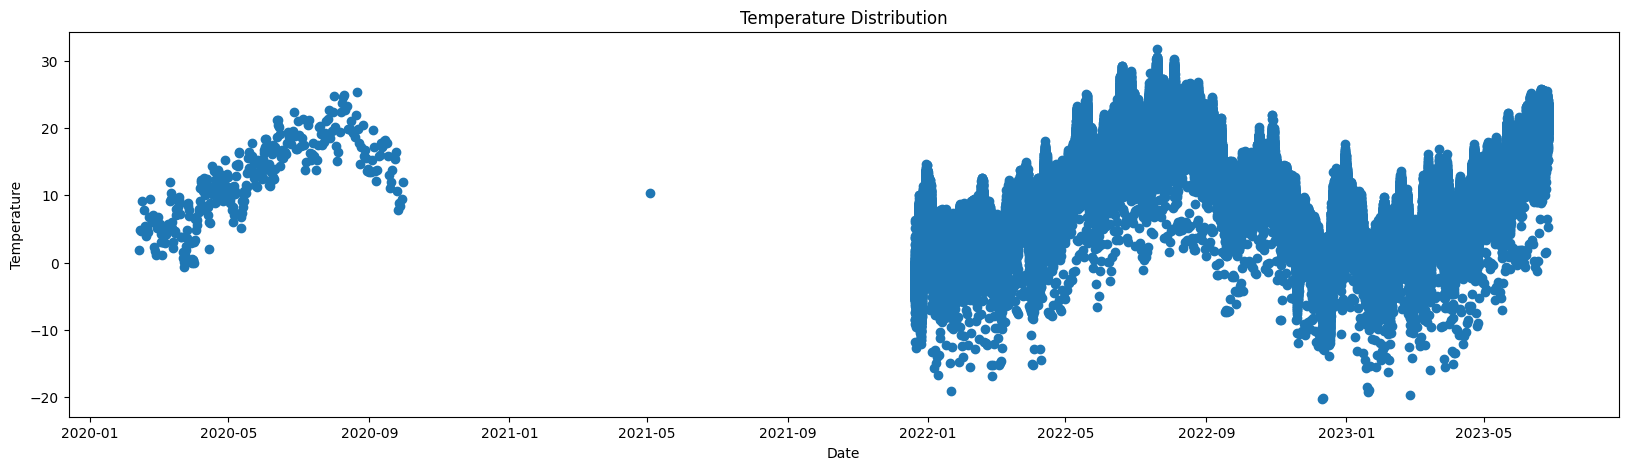

In [109]:
# px.box(merged_weather_df, x='date', y='temperature').show(renderer='vscode')
plt.figure(figsize=(20, 5))
plt.plot_date(merged_weather_df['date'], merged_weather_df['temperature'])
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Distribution")
plt.show();

In [110]:
tmp = merged_weather_df.query("date < '2020-11' and date > '2020-06'")
print(f"Number of recorded tempretures betweent 2020-06 & 2020-11: {len(tmp)}")
print(f"Number of recorded days betweent 2020-06 & 2020-11: {len(tmp['date'].unique())}")
print(f"Number of recorded stations betweent 2020-06 & 2020-11: {tmp['station_id'].nunique()}")

Number of recorded tempretures betweent 2020-06 & 2020-11: 135
Number of recorded days betweent 2020-06 & 2020-11: 121
Number of recorded stations betweent 2020-06 & 2020-11: 2


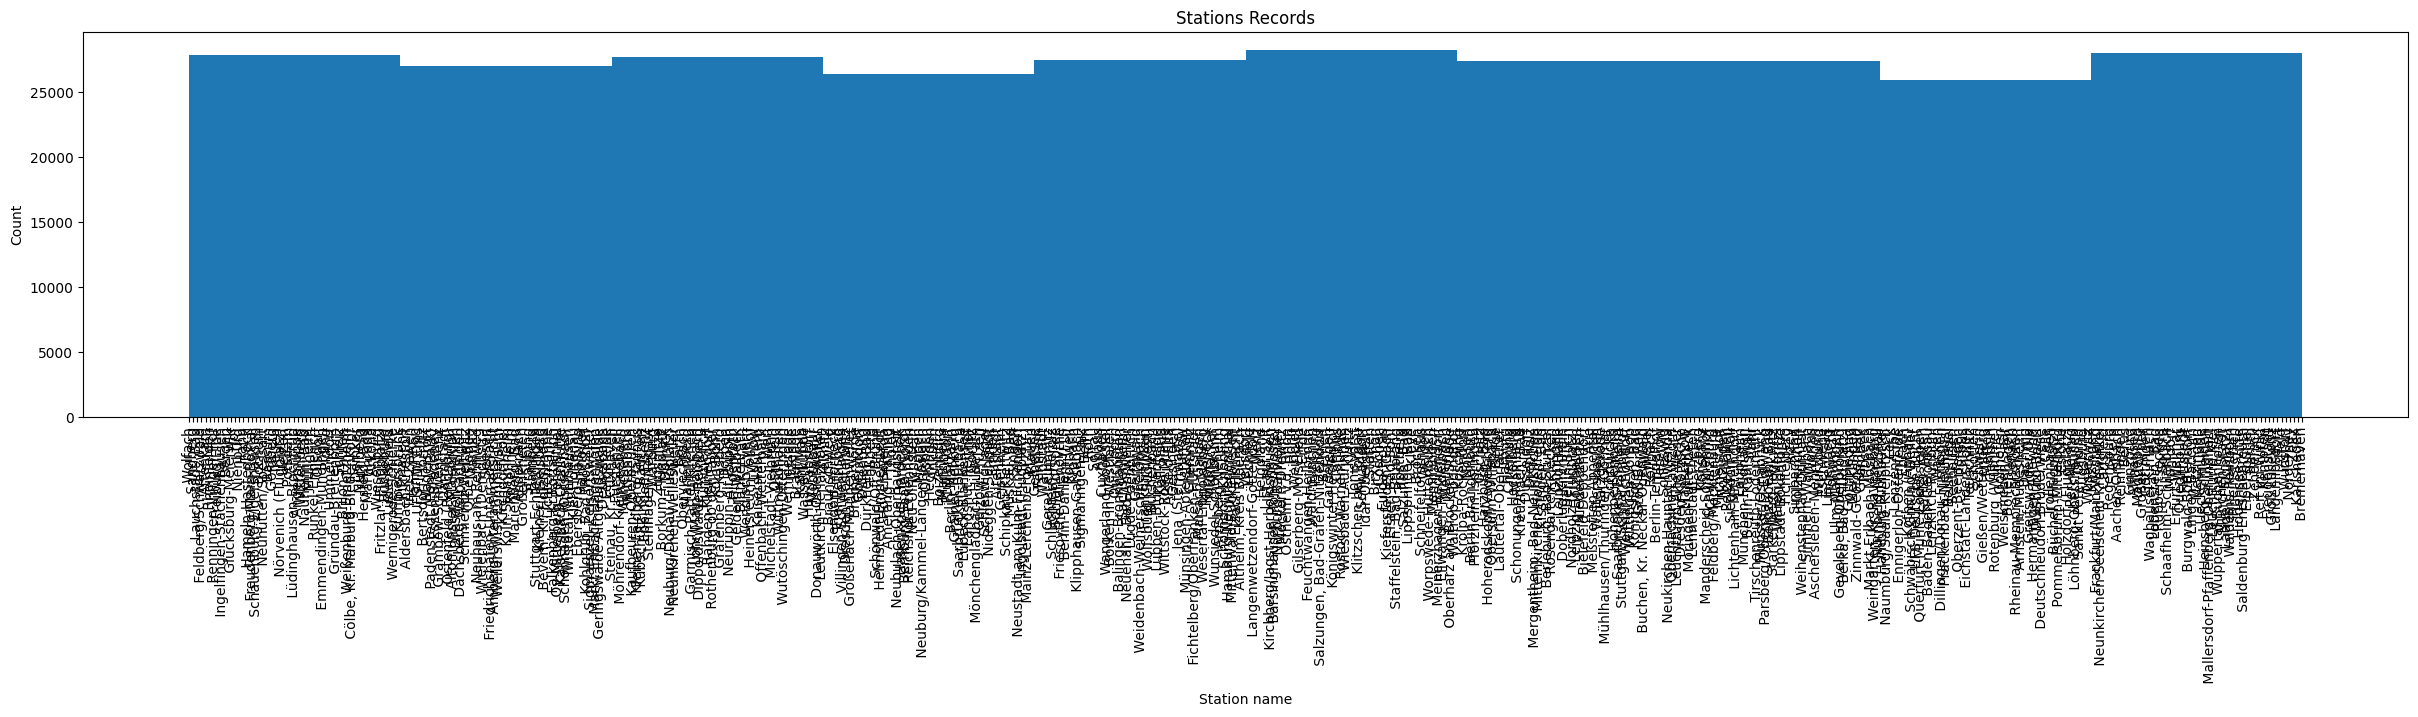

In [111]:
plt.figure(figsize=(30, 5))
plt.hist(merged_weather_df['station_name'])
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xlabel("Station name")
plt.title("Stations Records")
plt.show()

# Data combination

In [112]:
DELAY_THRESHOLD = "00:01:00"

In [113]:
condition1 = train_change_df['arrival_difference'] > DELAY_THRESHOLD
condition2 = train_change_df['departure_difference'] > DELAY_THRESHOLD
train_change_df['delay'] = np.where(condition1, 1, 0)
train_change_df['delay'] = np.where(condition2, 1, train_change_df['delay'])
train_change_df

,EVA_NR,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y,station_name,laenge,breite,arrival_difference,departure_difference,delay
0,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:10:00,2023-06-23 16:10:00,N/A,N/A,2023-06-23 16:12:00,2023-06-23 16:13:00,N/A,Hamburg Elbbrücken,10.024500,53.534500,0 days 00:02:00,0 days 00:03:00,1
1,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:00:00,2023-06-23 16:00:00,N/A,N/A,2023-06-23 16:05:00,2023-06-23 16:05:00,N/A,Hamburg Elbbrücken,10.024500,53.534500,0 days 00:05:00,0 days 00:05:00,1
2,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:24:00,2023-06-23 16:24:00,N/A,N/A,2023-06-23 16:25:00,2023-06-23 16:25:00,N/A,Hamburg Elbbrücken,10.024500,53.534500,0 days 00:01:00,0 days 00:01:00,0
3,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 16:42:00,2023-06-23 16:43:00,N/A,N/A,2023-06-23 16:42:00,2023-06-23 16:43:00,N/A,Hamburg Elbbrücken,10.024500,53.534500,0 days 00:00:00,0 days 00:00:00,0
4,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:04:00,2023-06-23 16:04:00,N/A,N/A,2023-06-23 16:08:00,2023-06-23 16:08:00,N/A,Hamburg Elbbrücken,10.024500,53.534500,0 days 00:04:00,0 days 00:04:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,8001723,,Einbeck-Salzderhelden,Einbeck Mitte,2023-06-25 16:21:00,2023-06-25 16:21:00,N/A,N/A,2023-06-25 16:21:00,2023-06-25 16:21:00,N/A,Einbeck Otto-Hahn-Straße,9.892910,51.814478,0 days 00:00:00,0 days 00:00:00,0
120,8004371,,Nörvenich-Binsfeld|Düren,Euskirchen|Nemmenich|Zülpich|Vettweiß|Vettweiß...,2023-06-25 15:00:00,2023-06-25 15:00:00,N/A,N/A,2023-06-25 15:00:00,2023-06-25 15:00:00,N/A,Nörvenich-Rommelsheim,6.547586,50.782539,0 days 00:00:00,0 days 00:00:00,0
121,8004371,,Vettweiß-Jakobwüllesheim|Vettweiß|Zülpich|Nemm...,Düren|Nörvenich-Binsfeld,2023-06-25 15:28:00,2023-06-25 15:29:00,N/A,N/A,2023-06-25 15:28:00,2023-06-25 15:29:00,N/A,Nörvenich-Rommelsheim,6.547586,50.782539,0 days 00:00:00,0 days 00:00:00,0
122,8004371,,Nörvenich-Binsfeld|Düren,Euskirchen|Nemmenich|Zülpich|Vettweiß|Vettweiß...,2023-06-25 16:00:00,2023-06-25 16:00:00,N/A,N/A,2023-06-25 16:01:00,2023-06-25 16:01:00,N/A,Nörvenich-Rommelsheim,6.547586,50.782539,0 days 00:01:00,0 days 00:01:00,0


In [114]:
train_change_df['arrival_difference_minuit'] = np.where(train_change_df['delay'], train_change_df['arrival_difference'].apply(lambda x: x.seconds/60), 0)
train_change_df['departure_difference_minuit'] = np.where(train_change_df['delay'], train_change_df['departure_difference'].apply(lambda x: x.seconds/60), 0)
train_change_df

,EVA_NR,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y,station_name,laenge,breite,arrival_difference,departure_difference,delay,arrival_difference_minuit,departure_difference_minuit
0,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:10:00,2023-06-23 16:10:00,N/A,N/A,2023-06-23 16:12:00,2023-06-23 16:13:00,N/A,Hamburg Elbbrücken,10.024500,53.534500,0 days 00:02:00,0 days 00:03:00,1,2.0,3.0
1,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:00:00,2023-06-23 16:00:00,N/A,N/A,2023-06-23 16:05:00,2023-06-23 16:05:00,N/A,Hamburg Elbbrücken,10.024500,53.534500,0 days 00:05:00,0 days 00:05:00,1,5.0,5.0
2,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:24:00,2023-06-23 16:24:00,N/A,N/A,2023-06-23 16:25:00,2023-06-23 16:25:00,N/A,Hamburg Elbbrücken,10.024500,53.534500,0 days 00:01:00,0 days 00:01:00,0,0.0,0.0
3,8002551,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-23 16:42:00,2023-06-23 16:43:00,N/A,N/A,2023-06-23 16:42:00,2023-06-23 16:43:00,N/A,Hamburg Elbbrücken,10.024500,53.534500,0 days 00:00:00,0 days 00:00:00,0,0.0,0.0
4,8002551,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-23 16:04:00,2023-06-23 16:04:00,N/A,N/A,2023-06-23 16:08:00,2023-06-23 16:08:00,N/A,Hamburg Elbbrücken,10.024500,53.534500,0 days 00:04:00,0 days 00:04:00,1,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,8001723,,Einbeck-Salzderhelden,Einbeck Mitte,2023-06-25 16:21:00,2023-06-25 16:21:00,N/A,N/A,2023-06-25 16:21:00,2023-06-25 16:21:00,N/A,Einbeck Otto-Hahn-Straße,9.892910,51.814478,0 days 00:00:00,0 days 00:00:00,0,0.0,0.0
120,8004371,,Nörvenich-Binsfeld|Düren,Euskirchen|Nemmenich|Zülpich|Vettweiß|Vettweiß...,2023-06-25 15:00:00,2023-06-25 15:00:00,N/A,N/A,2023-06-25 15:00:00,2023-06-25 15:00:00,N/A,Nörvenich-Rommelsheim,6.547586,50.782539,0 days 00:00:00,0 days 00:00:00,0,0.0,0.0
121,8004371,,Vettweiß-Jakobwüllesheim|Vettweiß|Zülpich|Nemm...,Düren|Nörvenich-Binsfeld,2023-06-25 15:28:00,2023-06-25 15:29:00,N/A,N/A,2023-06-25 15:28:00,2023-06-25 15:29:00,N/A,Nörvenich-Rommelsheim,6.547586,50.782539,0 days 00:00:00,0 days 00:00:00,0,0.0,0.0
122,8004371,,Nörvenich-Binsfeld|Düren,Euskirchen|Nemmenich|Zülpich|Vettweiß|Vettweiß...,2023-06-25 16:00:00,2023-06-25 16:00:00,N/A,N/A,2023-06-25 16:01:00,2023-06-25 16:01:00,N/A,Nörvenich-Rommelsheim,6.547586,50.782539,0 days 00:01:00,0 days 00:01:00,0,0.0,0.0


In [115]:
smallest_date = train_change_df['arrival_x'].min().strftime("%Y-%m-%d")
smallest_date

'2023-06-23'

In [116]:
merged_weather_df['date'].max()

Timestamp('2023-06-26 00:00:00')

In [117]:
date_weather_df = merged_weather_df[merged_weather_df['date'] >= smallest_date].drop(['station_id'], axis=1)
date_weather_df.reset_index(inplace=True, drop=True)
date_weather_df

,date,temperature,breite,laenge,station_name,Bundesland
0,2023-06-23,19.2,48.2953,8.2391,Wolfach,Baden-Württemberg
1,2023-06-23,15.3,50.3518,10.0034,Sandberg,Bayern
2,2023-06-23,17.6,51.3909,11.8786,"Lauchstädt, Bad",Sachsen-Anhalt
3,2023-06-23,10.9,47.8748,8.0038,Feldberg/Schwarzwald,Baden-Württemberg
4,2023-06-23,17.9,47.8774,11.3643,Attenkam,Bayern
...,...,...,...,...,...,...
1946,2023-06-25,22.5,53.4451,9.1390,Bremervörde,Niedersachsen
1947,2023-06-26,20.1,53.4451,9.1390,Bremervörde,Niedersachsen
1948,2023-06-24,19.5,53.9897,9.5697,Itzehoe,Schleswig-Holstein
1949,2023-06-25,22.2,53.9897,9.5697,Itzehoe,Schleswig-Holstein


In [118]:
import haversine as hs
def check_close_distance(lat_a: float, lon_a: float, lat_b: float, lon_b: float, distance_threshold=500):
    loc1 = (lat_a, lon_a)
    loc2 = (lat_b, lon_b)
    distance = hs.haversine(loc1,loc2, unit=hs.Unit.KILOMETERS)
    return distance < distance_threshold

In [119]:
df = pd.DataFrame()
for row_a in train_change_df.itertuples():
    for row_b in date_weather_df.itertuples():
        if check_close_distance(row_a.breite, row_a.laenge, row_b.breite, row_b.laenge):
            train_row_df = train_change_df.iloc[[row_a.Index]].reset_index(drop=True).rename({"station_name":"train_station_name", "laenge":"train_station_laenge", "breite":"train_station_breite"}, axis=1)
            weather_row_df = date_weather_df.iloc[[row_b.Index]].reset_index(drop=True).rename({"station_name":"weather_station_name", "laenge":"weather_station_laenge", "breite":"weather_station_breite"}, axis=1)
            tmp = pd.concat([train_row_df, weather_row_df], axis=1)
            df = pd.concat([df, tmp], axis=0)
            break
df.reset_index(drop=True, inplace=True)
df['arrival_difference'] = df['arrival_difference'].astype(str)
df.rename({"arrival_x":"planned_arrival", "arrival_y":"changed_arrival", "departure_x":"planned_departure",
            "departure_y":"changed_departure", "next_stations_x":"planned_next_stations",
            "next_stations_y":"changed_next_stations",}, axis=1, inplace=True)
df['departure_difference'] = df['departure_difference'].astype(str)
df['planned_arrival'] = df['planned_arrival'].astype(str)
df['changed_arrival'] = df['changed_arrival'].astype(str)
df['planned_departure'] = df['planned_departure'].astype(str)
df['changed_departure'] = df['changed_departure'].astype(str)
df['date'] = df['date'].astype(str)
df.drop(['passed_stations_x', 'passed_stations_y', 'platform_x', 'platform_y'], axis=1, inplace=True)
df

,EVA_NR,planned_next_stations,planned_arrival,planned_departure,changed_next_stations,changed_arrival,changed_departure,train_station_name,train_station_laenge,train_station_breite,...,departure_difference,delay,arrival_difference_minuit,departure_difference_minuit,date,temperature,weather_station_breite,weather_station_laenge,weather_station_name,Bundesland
0,8002551,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,2023-06-23 16:10:00,2023-06-23 16:10:00,N/A,2023-06-23 16:12:00,2023-06-23 16:13:00,Hamburg Elbbrücken,10.024500,53.534500,...,0 days 00:03:00,1,2.0,3.0,2023-06-23,15.3,50.3518,10.0034,Sandberg,Bayern
1,8002551,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,2023-06-23 16:00:00,2023-06-23 16:00:00,N/A,2023-06-23 16:05:00,2023-06-23 16:05:00,Hamburg Elbbrücken,10.024500,53.534500,...,0 days 00:05:00,1,5.0,5.0,2023-06-23,15.3,50.3518,10.0034,Sandberg,Bayern
2,8002551,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,2023-06-23 16:24:00,2023-06-23 16:24:00,N/A,2023-06-23 16:25:00,2023-06-23 16:25:00,Hamburg Elbbrücken,10.024500,53.534500,...,0 days 00:01:00,0,0.0,0.0,2023-06-23,15.3,50.3518,10.0034,Sandberg,Bayern
3,8002551,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,2023-06-23 16:42:00,2023-06-23 16:43:00,N/A,2023-06-23 16:42:00,2023-06-23 16:43:00,Hamburg Elbbrücken,10.024500,53.534500,...,0 days 00:00:00,0,0.0,0.0,2023-06-23,15.3,50.3518,10.0034,Sandberg,Bayern
4,8002551,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,2023-06-23 16:04:00,2023-06-23 16:04:00,N/A,2023-06-23 16:08:00,2023-06-23 16:08:00,Hamburg Elbbrücken,10.024500,53.534500,...,0 days 00:04:00,1,4.0,4.0,2023-06-23,15.3,50.3518,10.0034,Sandberg,Bayern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,8001723,Einbeck-Salzderhelden,2023-06-25 16:21:00,2023-06-25 16:21:00,N/A,2023-06-25 16:21:00,2023-06-25 16:21:00,Einbeck Otto-Hahn-Straße,9.892910,51.814478,...,0 days 00:00:00,0,0.0,0.0,2023-06-23,19.2,48.2953,8.2391,Wolfach,Baden-Württemberg
120,8004371,Nörvenich-Binsfeld|Düren,2023-06-25 15:00:00,2023-06-25 15:00:00,N/A,2023-06-25 15:00:00,2023-06-25 15:00:00,Nörvenich-Rommelsheim,6.547586,50.782539,...,0 days 00:00:00,0,0.0,0.0,2023-06-23,19.2,48.2953,8.2391,Wolfach,Baden-Württemberg
121,8004371,Vettweiß-Jakobwüllesheim|Vettweiß|Zülpich|Nemm...,2023-06-25 15:28:00,2023-06-25 15:29:00,N/A,2023-06-25 15:28:00,2023-06-25 15:29:00,Nörvenich-Rommelsheim,6.547586,50.782539,...,0 days 00:00:00,0,0.0,0.0,2023-06-23,19.2,48.2953,8.2391,Wolfach,Baden-Württemberg
122,8004371,Nörvenich-Binsfeld|Düren,2023-06-25 16:00:00,2023-06-25 16:00:00,N/A,2023-06-25 16:01:00,2023-06-25 16:01:00,Nörvenich-Rommelsheim,6.547586,50.782539,...,0 days 00:01:00,0,0.0,0.0,2023-06-23,19.2,48.2953,8.2391,Wolfach,Baden-Württemberg


In [120]:
df.to_sql("weather_train_delay", "sqlite:///data.sqlite", index=False, if_exists='append')

124